# NLP-Website-Legitimation

## Introduction

This project is about to demonstrate how to use NLP to detect if a website is legitimate.
Currently, work on English websites.

Flow:
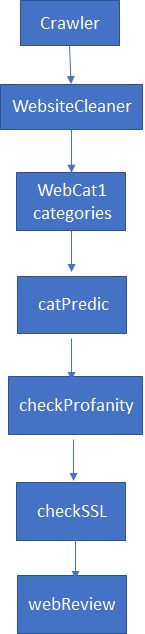


In [1]:
#Step:1 - Libraries
import time
import requests
from bs4 import BeautifulSoup
import urllib
import os

#Data path folder
path = 'G:/DataScienceProject/webcrawler/test/'

On webcrawler part, we shell extract all href (links) into single html file.
The idea is to collect all natual languages from all website part for further NLP catorization.

In [2]:
#Step:2 - WebCrawler
def webcrawler(url, path):
    print("Start webcrawler: \n", url )
    def folderBuilder(url, path):
        global newpath
        global webpageName
        position = [pos for pos, char in enumerate(url) if char == '.']
        position[0] = int(position[0]) + 1
        webpageName = url[position[0]:position[1]]

        # Check / at end of path
        len(path) - 1
        if path[len(path) - 1:] == '/':
            os.mkdir(path + webpageName)
            newpath = path + webpageName
        else:
            os.mkdir(path + '/' + webpageName)
            newpath = path + '/' + webpageName

        print("Building website folder")
        return

    def getData(url):
        print("Get main url")
        global data
        # Open the URL as Browser, not as python urllib
        page = urllib.request.Request(url, headers={
            'User-Agent': '"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.69 Safari/537.36"'})
        soup = urllib.request.urlopen(page).read()
        data = BeautifulSoup(soup, "html.parser")

        return

    def hrefAgg(data):
        print("Create HREF list")
        global hrefStartList
        # Aggregate href into file
        hrefStartList = list(data.findAll('a'))

        for i in range(len(hrefStartList)):
            link = str(hrefStartList[i])
            link = link[9:]
            link = link[:link.find('"')]
            # Check for http/https
            if link[0:4] == 'http':
                hrefStartList[i] = link
            else:
                hrefStartList[i] = ''

        # Remove dup
        hrefStartList = list(dict.fromkeys(hrefStartList))
        if hrefStartList.count('') == 1:
            del hrefStartList[hrefStartList.index('')]

        if hrefStartList != ['']:
            href2file = newpath + '/' + 'href.txt'
            file2write = open(href2file, 'w')
            file2write.write(str(hrefStartList))
            file2write.close()

        return

    def getMyHrefs(myUrl):
        print(myUrl)
        global data1
        page = urllib.request.Request(url, headers={
            'User-Agent': '"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.69 Safari/537.36"'})
        soup1 = urllib.request.urlopen(page).read()
        data1 = BeautifulSoup(soup1, "html.parser")

        time.sleep(1)

        return

    folderBuilder(url, path)
    getData(url)
    hrefAgg(data)
    data0 = str(data)
    for i in range(len(hrefStartList)):
        myUrl = hrefStartList[i]
        getMyHrefs(myUrl)
        data0 = data0 + str(data1)

    AppendHref2File = newpath + '/' + 'full_website.txt'
    file2write = open(AppendHref2File, 'w', encoding='utf8')
    file2write.write(data0)
    file2write.close()
    print("Complete webcrawler")
    return

In [3]:
#Step:3 - Run the webcrawler function
#For websites list
#Ural format: 'https://www.hbo.com/'
testList = ['https://www.hbo.com/']
for z, aurl in enumerate(testList):
    try:
        webcrawler(aurl, path)
    except:
        continue

Start webcrawler: 
 https://www.hbo.com/
Building website folder
Get main url
Create HREF list
https://www.hbo.com/insecure
Complete webcrawler


In [4]:
#Step:4 - Delete empty folders
import os

dataFolderList = os.listdir(path)
for a in dataFolderList:
    folderDel = path + a
    #Non empty floder will throw an error
    try:
        os.rmdir(folderDel)
    except:
        continue

if os.path.exists(path) == False:
    os.mkdir(path)

In [5]:
#Step:5  - Libraries
from nltk.tokenize import sent_tokenize
import nltk
en_stop = set(nltk.corpus.stopwords.words('english'))
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import re
import os

In [6]:
#Step:6 - html to text convertor function
stemmer = WordNetLemmatizer()
#Preprocess func
def preprocess_text(document):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(document))
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    # Converting to Lowercase
    document = document.lower()
    # Lemmatization
    tokens = document.split()
    tokens = [stemmer.lemmatize(word) for word in tokens]
    tokens = [word for word in tokens if word not in en_stop]
    tokens = [word for word in tokens if len(word) > 3]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text


In [7]:
#Step:7 - run convertor
for j, value in enumerate(dataFolderList):
    #Load each site full_website.txt
    fullWebFile = path + value + '/' + 'full_website.txt'
    print(value)
    try:
        f = open(fullWebFile, 'r', encoding='utf-8')
        data = f.read()
        f.close()
        data = BeautifulSoup(data, "html.parser")
        text = data.get_text(strip=True)
        #Break html into sentences
        text = sent_tokenize(text)
        text = preprocess_text(text)
        myCleanFile = path + value + '/clean_' + value +'.txt'
        file2write = open(myCleanFile, 'w', encoding='utf8')
        file2write.write(text)
        file2write.close()
    except:
        continue

hbo


For the category part, an early pre-phase in need as followed:
- We need to create a dictionary by category.
- I used the followed link: https://www.wordstream.com/popular-keywords
- Dictionary example: {"car": "1", "auto": "2", "used cars": "3", "autos": "4", "mechanic": "5", "automobile": "6"}
- File extension should be *.xlsx

In [8]:
#Step:8 - Handling the issue of common keywords in other categories & combine all dic into a single list (list of lists)
import json
dirpath = 'G:/DataScienceProject/webcrawler/'
genCatDic = []
results = []
results += [each for each in os.listdir(dirpath) if each.endswith('.xlsx')]
for elem in results:
    listName = elem[:-5]
    dicName = dirpath + elem
    with open(dicName, 'r') as file:
        dic = json.load(file)
    genCatDic.append(list(dic))

#Find non common keyword for category from each categogry type
catDic = {}
for i, value in enumerate(results):
    commonList = []
    for j in range(0,len(results)):
        if j != i:
            commonList += genCatDic[j]

    diffList = list(set(genCatDic[i]).difference(commonList))
    catDic[value[:-5]] = diffList

filename = dirpath + 'categoriesDic.xlsx'
with open(filename, 'w') as file:
    json.dump(catDic, file)


In [9]:
#Step:9 - Category prediction
import json

dicName = 'G:/DataScienceProject/webcrawler/categoriesDic.xlsx'
with open(dicName, 'r') as file:
    dic = json.load(file)

#Load target website after cleansing
catList = os.listdir('G:/DataScienceProject/webcrawler/test')
for d, valued in enumerate(catList):
    filename = path + valued + '/clean_' +valued + '.txt'
    f = open(filename, 'r', encoding='utf-8')
    websiteData = f.read()
    f.close()

    #Category classifier
    maxCatCounter = 0
    for i, valueF in enumerate(dic.keys()):
        currentCatCounter = 0
        for j, valueG in enumerate(dic[valueF]):
            if websiteData.count(valueG) > 0:
                currentCatCounter += 1

        if currentCatCounter > maxCatCounter:
            maxCatCounter = currentCatCounter
            catClass = valueF

    filename = filename.replace("clean_", "")
    with open(filename, 'a+') as f:
        f.write(f"Followed report for: {valued}\nWebsite category: {catClass}\n")
        f.close()

In [10]:
#Step:10 - Profanity check
#Load Google profanity
profanityPath = 'G:/DataScienceProject/webcrawler/Google-profanity.txt'
with open(profanityPath, 'r') as f:
    profanity = f.read()
    f.close()

profanity = profanity.split("\n")

for e, valuee in enumerate(catList):
    filename = path + valuee + '/' +valuee + '.txt'
    #Load website
    f = open(filename, 'r', encoding='utf-8')
    websiteData = f.read()
    f.close()
    websiteData = websiteData.split(" ")

    if set(profanity).intersection(list(set(websiteData))) != 0:
        msg = str(len(set(profanity).intersection(list(set(websiteData))))) + " found"
    else:
        msg = "Clean"

    with open(filename, 'a+') as f:
        f.write(f"Profanity check: {msg}\n")
        f.close()

In [11]:
#Step:11 - SSL check for security function
from urllib.request import ssl, socket
import json
import datetime
import time

def checkSSL(url, port):
    try:
        context = ssl.create_default_context()
        with socket.create_connection((url, port), timeout=5) as sock:
            with context.wrap_socket(sock, server_hostname=url) as ssock:
                print(ssock.version())
                data = json.dumps(ssock.getpeercert())
    except:
        msg = "SSL chcek: connectivity issue"

    if data != '':
        notBeforeCert = data[data.find("notBefore")-1:].split('"')[3]
        notBeforeCert = notBeforeCert[:-4] #remove GMT
        notAfterCert = data[data.find("notAfter")-1:].split('"')[3]
        notAfterCert = notAfterCert[:-4]

        today = datetime.date.today()
        currentTime = time.mktime(today.timetuple())
        timestruct1 = time.strptime(notBeforeCert, "%b %d %H:%M:%S %Y")
        before = time.mktime(timestruct1)
        timestruct2 = time.strptime(notAfterCert, "%b %d %H:%M:%S %Y")
        after = time.mktime(timestruct2)

        if before < currentTime < after:
            msg = "SSL chcek: valid"
        else:
            msg = "SSL chcek: certificate issue"

    file = url.split(".")[1]
    path = 'G:/DataScienceProject/webcrawler/test/'
    filename = path + file + '/' + file+ '.txt'
    with open(filename, 'a+') as f:
        f.write(f"{msg}\n")
        f.close()

    return

In [12]:
#Step:12 - Actual SSL check 
#url = 'www.walla.co.il'
port = '443'
#testList
for i, value in enumerate(testList):
    if value.count("/") > 0:
        value = value.split("/")[2]
        url = value
    checkSSL(url, port)

TLSv1.2


In [13]:
#Step:13 - Prepare for beb reviews
from bs4 import BeautifulSoup
import urllib
import os

def websiteName(url):
    global reviewUrl
    global newpath
    global webpageName
    reviewUrl = url.split("/")[2]
    reviewUrl = reviewUrl.split("www.")[1]
    return reviewUrl

In [14]:
#Step:12 - Web review#1
def getSitejabber(reviewUrl):
    global data
    reviewSiteUrl = 'https://www.sitejabber.com/reviews/' + reviewUrl
    # Open the URL as Browser, not as python urllib
    page = urllib.request.Request(reviewSiteUrl, headers={
        'User-Agent': '"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.69 Safari/537.36"'})
    soup = urllib.request.urlopen(page).read()
    data = BeautifulSoup(soup, "html.parser")
    text = data.get_text(strip=True)
    position = text.find('stars') #www.sitejabber.com
    if position != -1:
        text = text[position-5:position-1]
    else:
        text = 0

    path = 'G:/DataScienceProject/webcrawler/test/'
    fullFileName = path + reviewUrl[:-4] +  '/' + reviewUrl[:-4] +'.txt'
    with open(fullFileName, 'a+') as f:
        f.write(f"website review#1: {text}\n")
        f.close()
    return

In [15]:
#Step:13 - Web review#2
def getTrustpilot(reviewUrl):
    global data
    global js
    reviewSiteUrl = 'https://www.trustpilot.com/review/www.' + reviewUrl
    # Open the URL as Browser, not as python urllib
    page = urllib.request.Request(reviewSiteUrl, headers={
        'User-Agent': '"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.69 Safari/537.36"'})
    soup = urllib.request.urlopen(page).read()
    data = BeautifulSoup(soup, "html.parser")
    js=str(data.findAll('script'))
    js = js[js.find('trustScore'): js.find('trustScore')+18].split(",")[0]
    if js != '':
        js = float(js.split(":")[1])
    else:
        js = 0

    path = 'G:/DataScienceProject/webcrawler/test/'
    fullFileName = path + reviewUrl[:-4] +  '/' + reviewUrl[:-4] +'.txt'
    with open(fullFileName, 'a+') as f:
        f.write(f"website review#2: {js}\n")
        f.close()
    return

In [16]:
#Step:14 - actual run for web reviews
for i, value in  enumerate(testList):
    websiteName(value)
    getSitejabber(reviewUrl)
    getTrustpilot(reviewUrl)

In [17]:
#Step:15 - Log view (jsu for demo)
path = 'G:/DataScienceProject/webcrawler/test/'
fullFileName = path + reviewUrl[:-4] +  '/' + reviewUrl[:-4] +'.txt'
fullFileName
with open(fullFileName, 'r') as f:
        log=f.read()
        f.close()
print(log)

Followed report for: hbo
Website category: Cellular
Profanity check: 0 found
SSL chcek: valid
website review#1: 4.23
website review#2: 1.9



## Conclution

Its the 1st NLP project from end to end & it's awesome!!!
Further to this part, I'd like to check the image recognition for webstie legitimation.